# **MBP1413H Pytorch Tutorial With Google Colab**
This tutorial was written by [Ahmadreza Attarpour](https://github.com/AAttarpour) for MBP1413H

# **Introduction**
PyTorch is an open-source ML library that facilitates the development of DL models. It is widely used for research and production due to its flexibility, dynamic computation graph, and strong community support.

# **What is Pytorch?**
PyTorch is a DL python library that allows researchers and developers to build and train artificial neural networks. It provides a range of computational modules, making it easier to debug and experiment with models. PyTorch is widely adopted in both academia and industry, making it an essential tool for anyone working in machine learning.

In sum PyTorch:
- Facilitates working with arrays and tensors efficiently in Python (wraps NumPy for CPU tensors).

- Adds automatic differentiation which is needed in model development.

- Provides a high-level abstractions for working with DL models.

- Adds GPU support.

# **Getting Started with PyTorch**
Let's start by exploring the official PyTorch documentation:

[PyTorch Official Documentation and Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)


This documentation provides comprehensive guides, tutorials, and API references to help you get familiar with PyTorch.

*Remember:*
* This link is the first source you should check to learn, debug, etc.
* Check: https://pytorch.org/docs/stable/index.html (especially torch, torch.nn, torch.nn.functional, and torch.Tensor).

# **Section 1: Introduction to PyTorch Basics / PyTorch API**

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import random
%matplotlib inline

In [39]:
# Create a tensor (a multi-dimensional array)
# PyTorch's fundamental data structure is a tensor, similar to NumPy arrays.

tensor_a = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
tensor_a

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [40]:
arr_a_np = np.array([1.0, 2.0, 3.0, 4.0], dtype=np.float32)
tensor_a_np = torch.from_numpy(arr_a_np)

# Torch abstracts over NumPy but uses a NumPy-compatible representation under the hood
# Modify the tensor, which reflects in the NumPy array

tensor_a_np[0] = 100.0
tensor_a_np[1] = 200.0
tensor_a_np.data.numpy()[2] = 300
tensor_a_np

tensor([100., 200., 300.,   4.])

In [41]:
tensor_a_np.shape

torch.Size([4])

In [42]:
tensor_a_np.reshape(-1, 1)

tensor([[100.],
        [200.],
        [300.],
        [  4.]])

In [43]:
tensor_a_np.reshape(-1, 1).shape

torch.Size([4, 1])

In [44]:
# Broadcasting
# Broadcasting allows element-wise operations between tensors of different shapes.
# tensor_a_np.reshape(-1, 1) reshapes the tensor into a column vector.
# Broadcasting allows us to add the column vector to the original tensor element-wise, even though their shapes are different.
tensor_a_np.reshape(-1, 1) + tensor_a_np

tensor([[200., 300., 400., 104.],
        [300., 400., 500., 204.],
        [400., 500., 600., 304.],
        [104., 204., 304.,   8.]])

In [45]:
# Broadcasting example #2
# Create tensors of different shapes
tensor_x = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_y = torch.tensor([10, 20, 30])

# Broadcasting: Add a vector to each row of a matrix
result_broadcast = tensor_x + tensor_y
print("Broadcast Result:")
print(result_broadcast)

Broadcast Result:
tensor([[11, 22, 33],
        [14, 25, 36]])


In [46]:
# Dot product
# The dot product is calculated using the @ operator, which is equivalent to calling torch.matmul(tensor_a_np, tensor_a_np.T).
tensor_a_np @ tensor_a_np.T
# Here, tensor_a_np is a 1-dimensional tensor, and tensor_a_np.T is the transpose of the tensor, which is also 1-dimensional. When you perform the dot product of two 1-dimensional tensors, the result is a scalar.

tensor(140016.)

# **Section 2: PyTorch GPU Support**
We have the capability to transfer PyTorch tensors to the GPU, enabling us to execute certain computations at a significantly accelerated pace.

In [47]:
# Check if GPU is available
if torch.cuda.is_available():
    # Move tensor to GPU
    tensor_gpu = tensor_a_np.to('cuda')

    # Perform operations on GPU
    tensor_gpu *= 2

    # Move tensor back to CPU
    tensor_cpu = tensor_gpu.to('cpu')

    print("Tensor on GPU:")
    print(tensor_gpu)
    print("\nTensor back on CPU:")
    print(tensor_cpu)
else:
    print("GPU not available. Please enable GPU support in your Colab runtime.")


Tensor on GPU:
tensor([200., 400., 600.,   8.], device='cuda:0')

Tensor back on CPU:
tensor([200., 400., 600.,   8.])


# **Section 3: PyTorch Automatic differentiation**
PyTorch enables the creation of dynamic computational graphs, which can be efficiently executed on GPUs.

E.g. let's work on:
$$f(x) = x^2 + 3x + 2$$

In [48]:
# Define the function
def f(x):
    return x**2 + 3*x + 2

# Create a tensor for automatic differentiation
x = torch.tensor([2.0], requires_grad=True)

# Evaluate the function
y = f(x)

# Perform backward pass to compute gradients
y.backward()

# Access gradient
grad_x = x.grad

# Print the result and gradient
print("Result of the function:")
print(y.item())
print("\nGradient of x:")
print(grad_x.item())

Result of the function:
12.0

Gradient of x:
7.0


In [49]:
# another time
np_x = np.array([5.0])
x = torch.from_numpy(np_x).requires_grad_(True)
y = f(x)

In [50]:
# Perform backward pass to compute gradients
y.backward()
# Access gradient
grad_x = x.grad
# Print the result and gradient
print("Result of the function:")
print(y.item())
print("\nGradient of x:")
print(grad_x.item())

Result of the function:
42.0

Gradient of x:
13.0


# **Section 4: Linear Models with PyTorch**

The **MNIST** dataset, accessible from this source, comprises a training set with 60,000 handwritten digit examples and a test set with 10,000 examples. This dataset is a subset of a more extensive collection provided by NIST. The digits within the dataset have undergone size normalization and have been centered within fixed-size images.

In [51]:
# Step 1: Define the Linear Model
class LinearModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=in_dim, out_features=out_dim, bias=True)

    def forward(self, x):
        x = self.linear(x)
        return x

# Step 2: Load and Preprocess the MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Step 3: Initialize the Model, Loss Function, and Optimizer
model = LinearModel(in_dim=28 * 28, out_dim=10)  # Input dimension is 28*28 for MNIST images, output dimension is 10 for digits 0-9
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train the Model
num_epochs = 5

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.view(-1, 28 * 28)  # Flatten the images
        outputs = model(images)
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


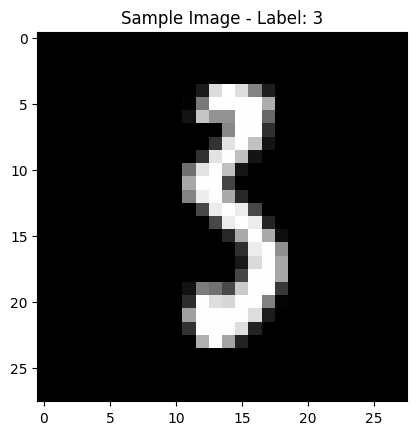

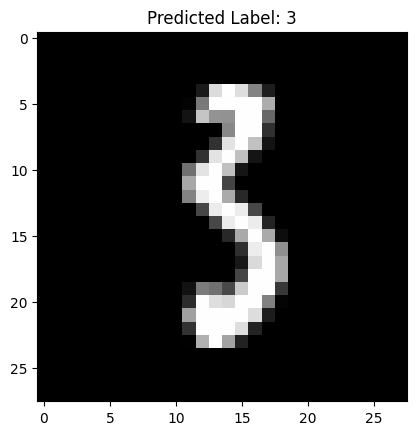

In [52]:
# Step 5: Plot a Sample from Training Set and Paired Ground Truth
sample_image, sample_label = train_dataset[random.randint(0, len(train_dataset)-1)]
plt.imshow(sample_image[0], cmap='gray')
plt.title(f"Sample Image - Label: {sample_label}")
plt.show()

# Step 6: Evaluate the Model on a Sample
sample_image = sample_image.view(-1, 28 * 28)
model.eval()
with torch.no_grad():
    predicted_label = torch.argmax(model(sample_image)).item()

# Step 7: Plot the Results
plt.imshow(sample_image.view(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

In [53]:
# let's specify a test set and evaluate model performance
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
# Evaluate the model on the test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs = inputs.view(-1, 28 * 28)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate and print the accuracy on the test set
accuracy = correct / total
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 91.39%


**Note: ~%90 accuracy for MNIST dataset is not considered good as the benchmark for this task is higher than %99.**

**to do (optional): in this course, you'll learn about CNN models (Stay tuned!). Subsitute the linear model with a CNN model and compare the accuracy of two models. Ask me your questions if you have any 😀**